In [1]:
import imageio
import numpy as np
from skimage import morphology
import matplotlib.pyplot as plt

In [2]:
S = np.zeros([7,7])
S[3, 1:6] = 1
S[1:6, 2:5] = 1
S

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [3]:
W = morphology.dilation(S, morphology.diamond(1))
W

array([[0., 0., 1., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1., 0., 0.]])

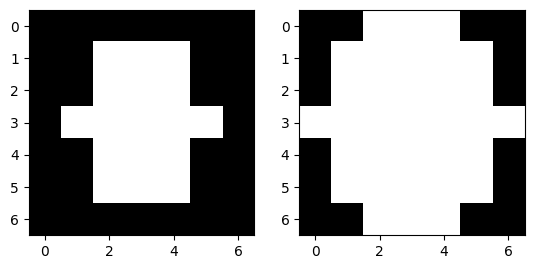

In [5]:
plt.subplot(121); plt.imshow(S, cmap = "gray")
plt.subplot(122); plt.imshow(W, cmap = "gray")

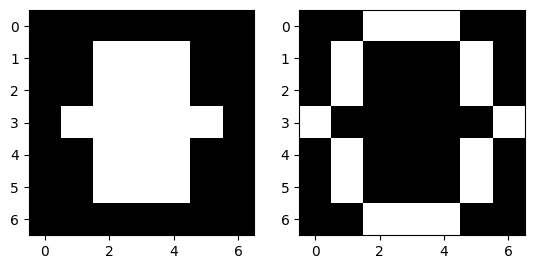

In [6]:
WminuS = W-S
plt.subplot(121); plt.imshow(S, cmap = "gray")
plt.subplot(122); plt.imshow(WminuS, cmap = "gray")

In [21]:
img = np.zeros((20, 20))
edg_img = np.zeros((20, 20))
edg_img[5, 2] = 1
edg_img[5, 15] = 1

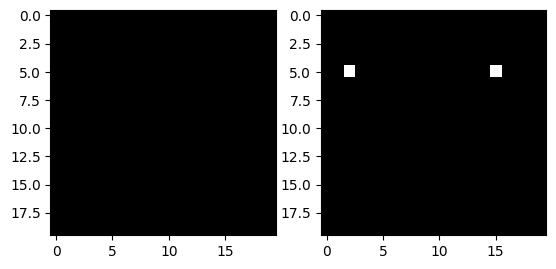

In [22]:
plt.subplot(121);
plt.imshow(img, cmap = "gray")
plt.subplot(122);
plt.imshow(edg_img, cmap = "gray")

In [23]:
import matplotlib.lines as mlines


def line_detection_non_vectorized(image, edge_image, num_rhos=180, num_thetas=180, t_count=220):
  edge_height, edge_width = edge_image.shape[:2]
  edge_height_half, edge_width_half = edge_height / 2, edge_width / 2
  #
  d = np.sqrt(np.square(edge_height) + np.square(edge_width))
  dtheta = 180 / num_thetas
  drho = (2 * d) / num_rhos
  #
  thetas = np.arange(0, 180, step=dtheta)
  rhos = np.arange(-d, d, step=drho)
  #
  cos_thetas = np.cos(np.deg2rad(thetas))
  sin_thetas = np.sin(np.deg2rad(thetas))
  #
  accumulator = np.zeros((len(rhos), len(rhos)))
  #
  figure = plt.figure(figsize=(12, 12))
  subplot1 = figure.add_subplot(1, 4, 1)
  subplot1.imshow(image)
  subplot2 = figure.add_subplot(1, 4, 2)
  subplot2.imshow(edge_image, cmap="gray")
  subplot3 = figure.add_subplot(1, 4, 3)
  subplot3.set_facecolor((0, 0, 0))
  subplot4 = figure.add_subplot(1, 4, 4)
  subplot4.imshow(image)
  #
  for y in range(edge_height):
    for x in range(edge_width):
      if edge_image[y][x] != 0:
        edge_point = [y - edge_height_half, x - edge_width_half]
        ys, xs = [], []
        for theta_idx in range(len(thetas)):
          rho = (edge_point[1] * cos_thetas[theta_idx]) + (edge_point[0] * sin_thetas[theta_idx])
          theta = thetas[theta_idx]
          rho_idx = np.argmin(np.abs(rhos - rho))
          accumulator[rho_idx][theta_idx] += 1
          ys.append(rho)
          xs.append(theta)
        subplot3.plot(xs, ys, color="white", alpha=0.05)

  for y in range(accumulator.shape[0]):
    for x in range(accumulator.shape[1]):
      if accumulator[y][x] > t_count:
        rho = rhos[y]
        theta = thetas[x]
        a = np.cos(np.deg2rad(theta))
        b = np.sin(np.deg2rad(theta))
        x0 = (a * rho) + edge_width_half
        y0 = (b * rho) + edge_height_half
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        subplot3.plot([theta], [rho], marker='o', color="yellow")
        subplot4.add_line(mlines.Line2D([x1, x2], [y1, y2]))

  subplot3.invert_yaxis()
  subplot3.invert_xaxis()

  subplot1.title.set_text("Original Image")
  subplot2.title.set_text("Edge Image")
  subplot3.title.set_text("Hough Space")
  subplot4.title.set_text("Detected Lines")
  plt.show()
  return accumulator, rhos, thetas

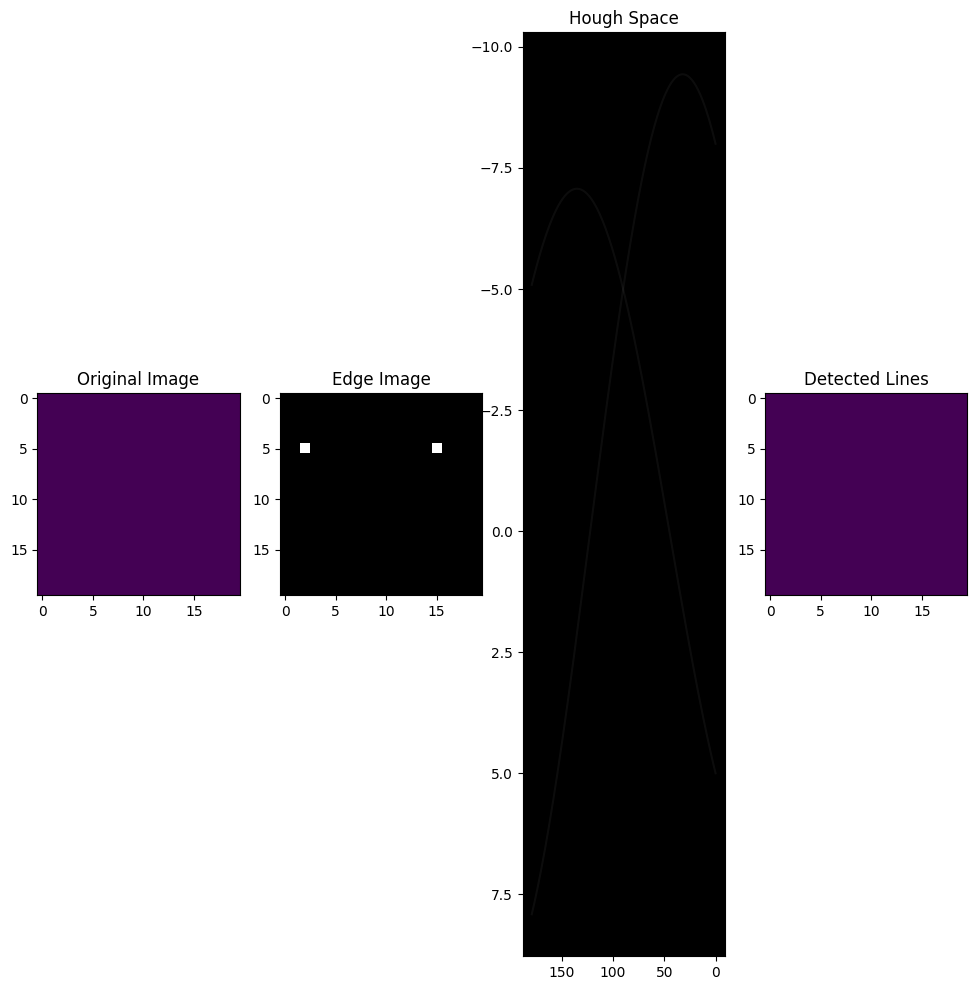

In [25]:
result = line_detection_non_vectorized(img, edg_img, num_rhos=180, num_thetas=180, t_count=220)

In [ ]:
edge_height = 10
edge_width = 10
d = np.sqrt(np.square(edge_height) + np.square(edge_width))
dtheta = 180 / num_thetas
drho = (2 * d) / num_rhos
#
thetas = np.arange(0, 180, step=dtheta)
rhos = np.arange(-d, d, step=drho)
#
cos_thetas = np.cos(np.deg2rad(thetas))
sin_thetas = np.sin(np.deg2rad(thetas))